In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sir_utilities import *

from scipy.integrate import solve_ivp

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False
beta large= -6.787250000000007
bigdelta0= 41.404762562500196


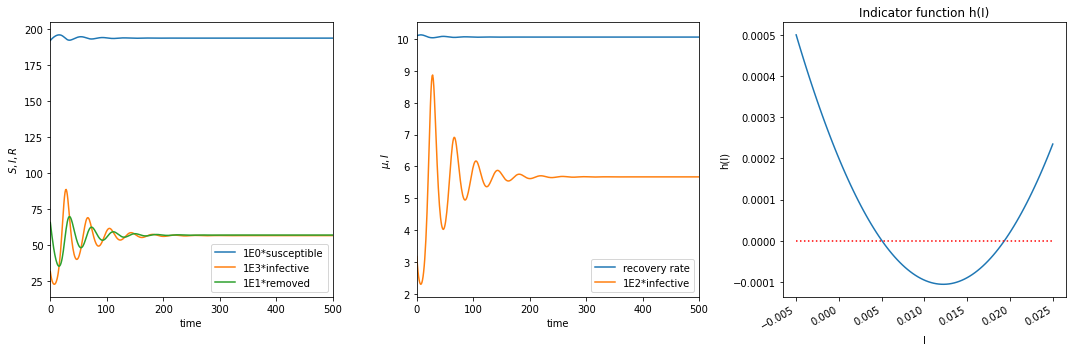

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate
# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)
# useful info to assert some properties over the dynamical system, as seen in 
# "Bifurcations and complex dynamics of an SIR model with the impact of the number of hospital beds"
print("beta large=",(d+nu+mu0-beta)*A+(beta-nu)*(d+nu+mu1)*b)
delta0 = d + nu + mu0
delta1 = d + nu + mu1
print("bigdelta0=",(beta-nu)**2 * delta1**2 * b**2 - 2*A*(beta-nu)*(beta*(mu1-mu0)+delta0*(delta1-beta))*b+A**2 * (beta-delta0)**2)

# simulation
rng = np.random.default_rng(random_state)

# random sample an inital value for S,I and R
SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

# solve the trajectory given a starting point, evaluated in certain time
time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

# plot from right to left: SIR plot, recovery_rate vs infected, indicator function
plot_SIR_variables(sol, b, mu0, mu1, beta, A, d, nu)

D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX3\sir_utilities.py:187: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(figsize, figsize))


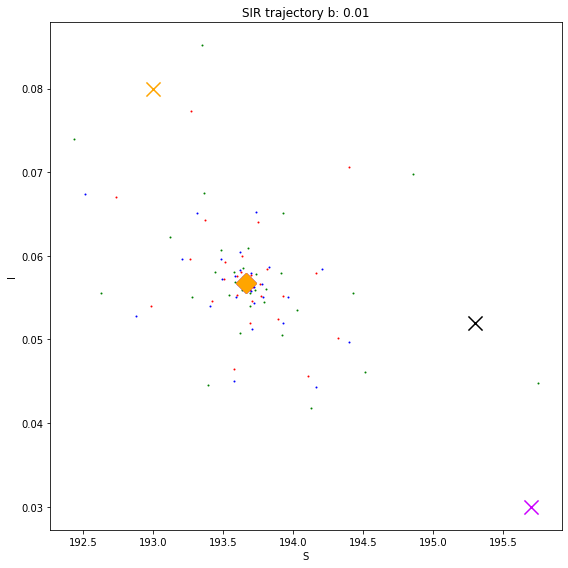

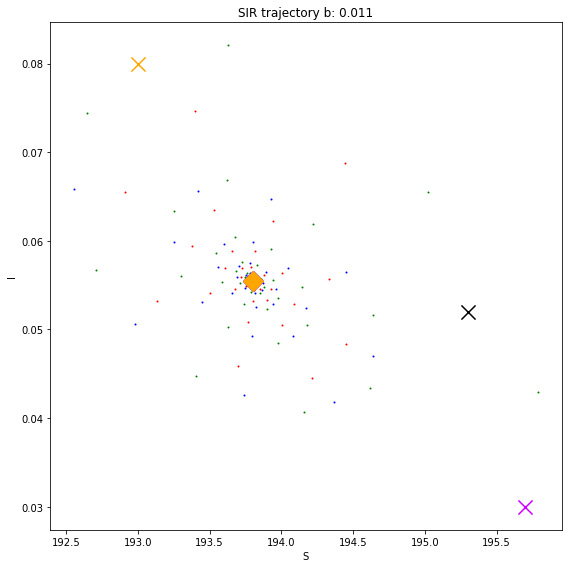

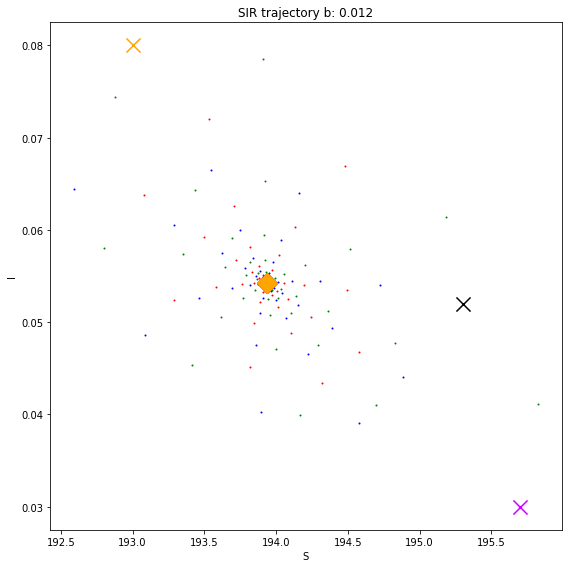

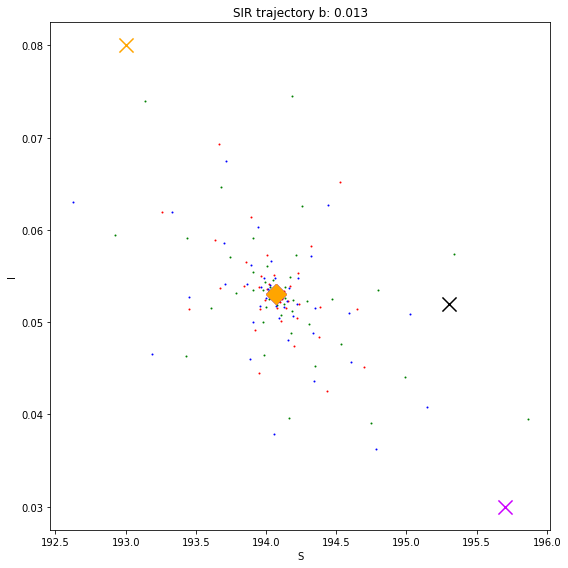

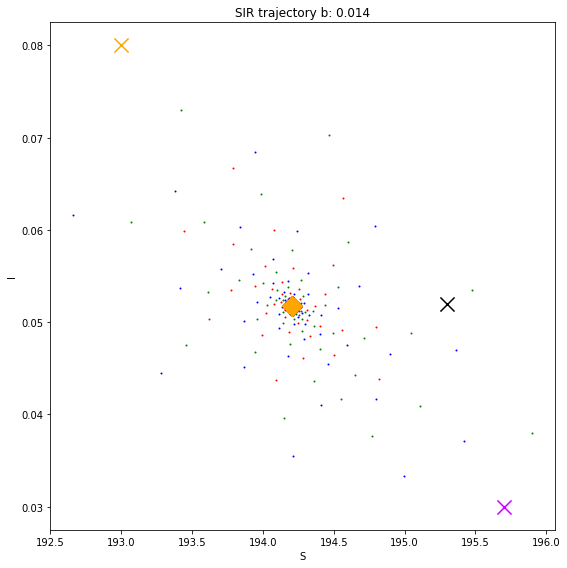

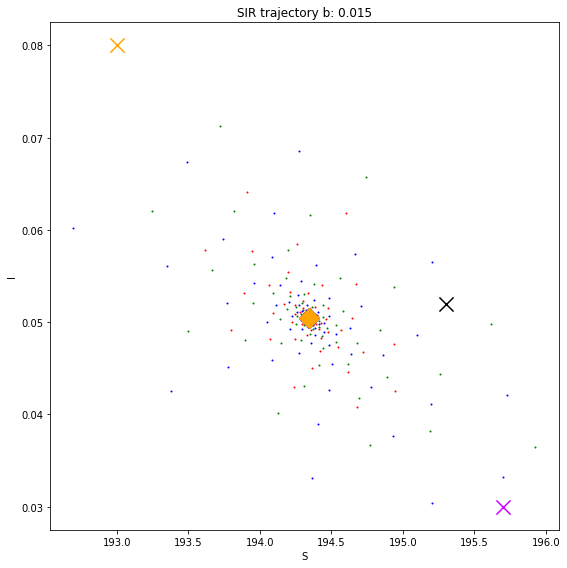

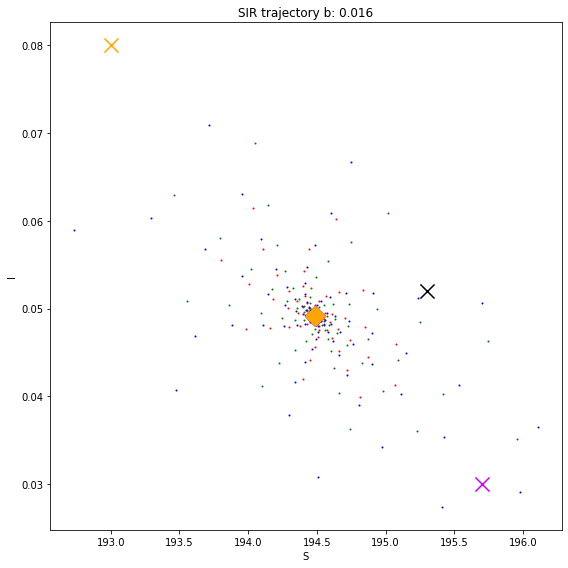

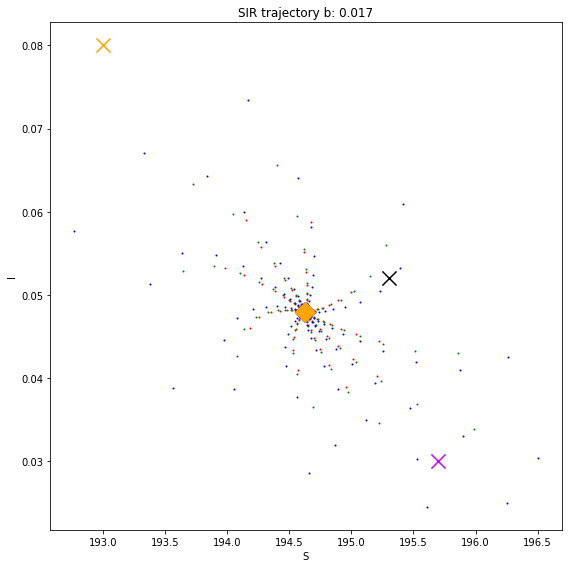

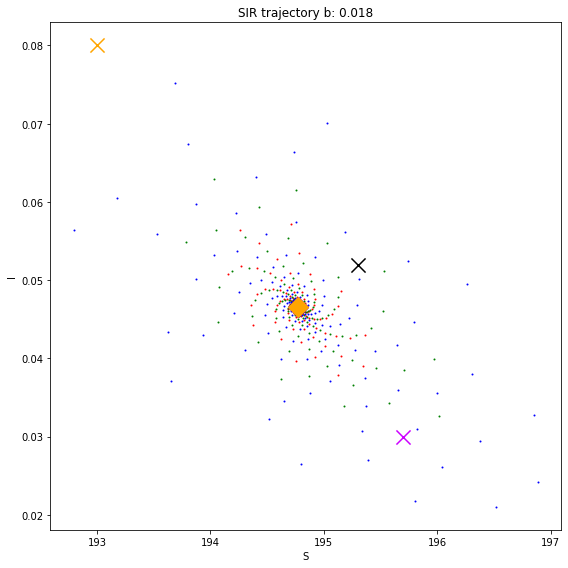

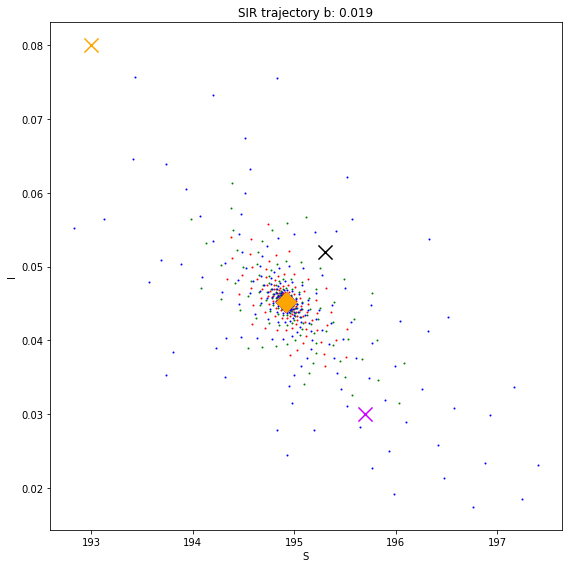

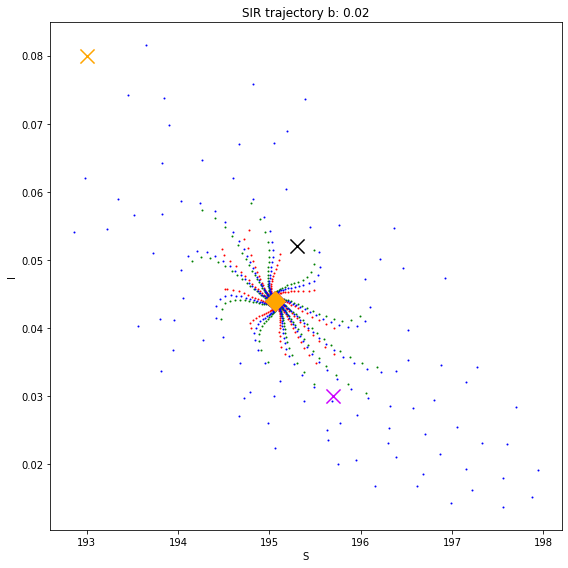

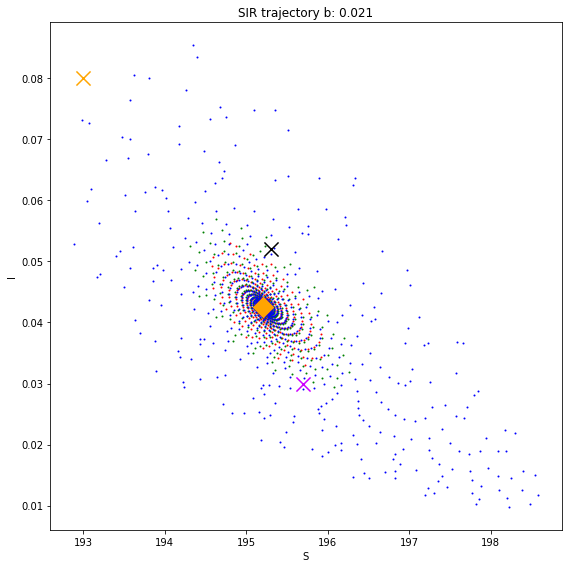

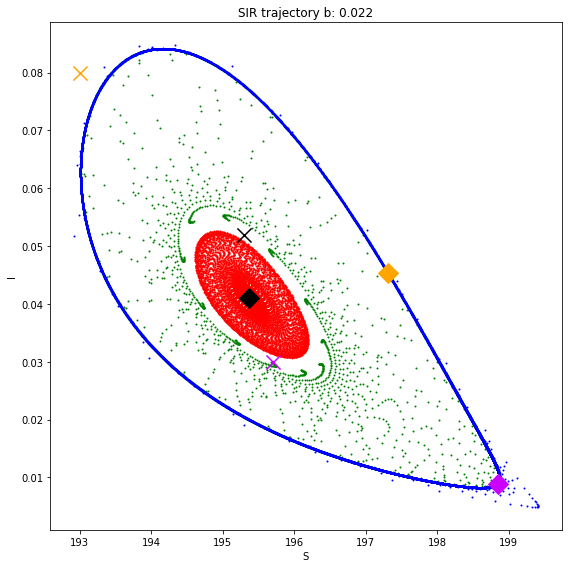

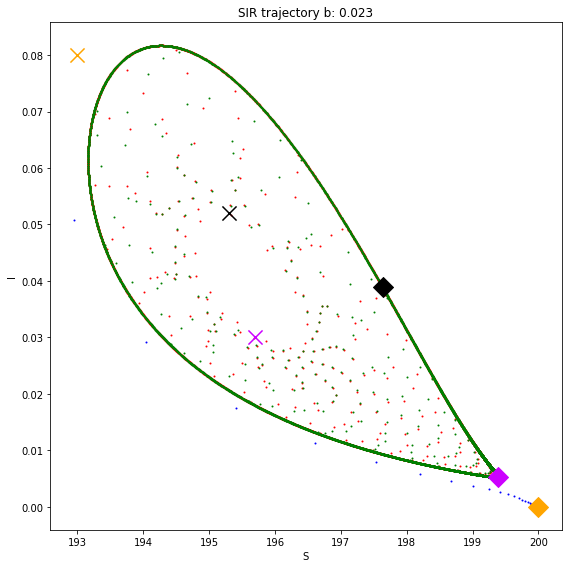

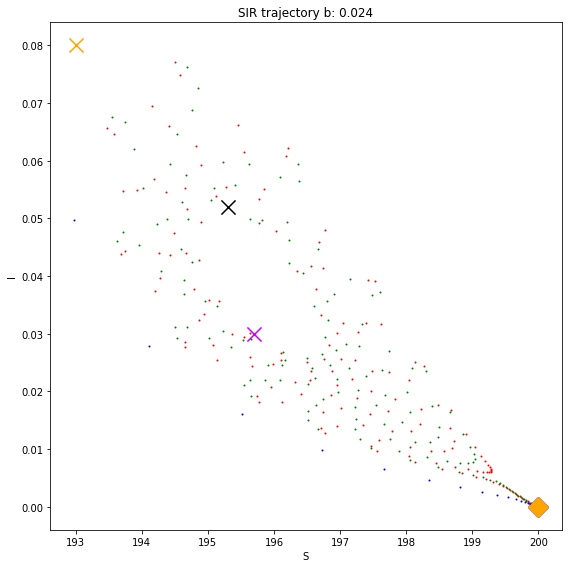

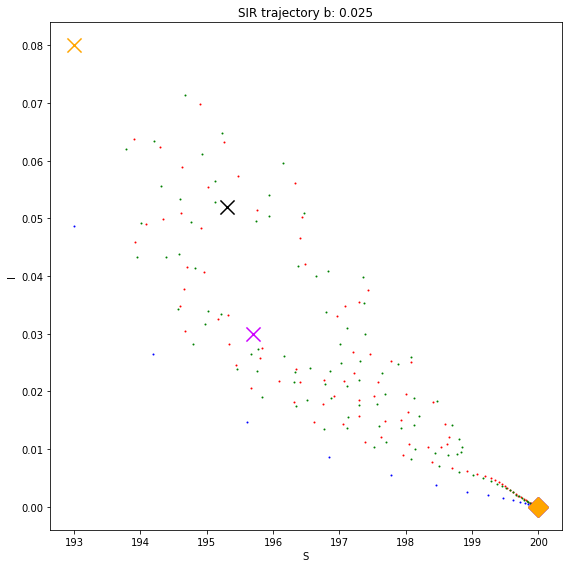

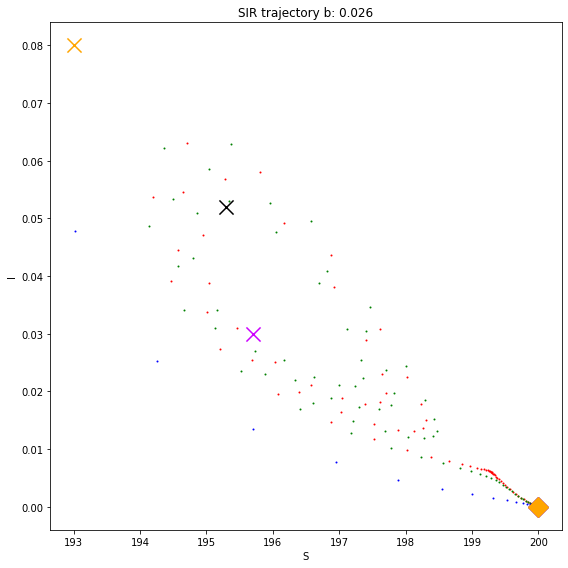

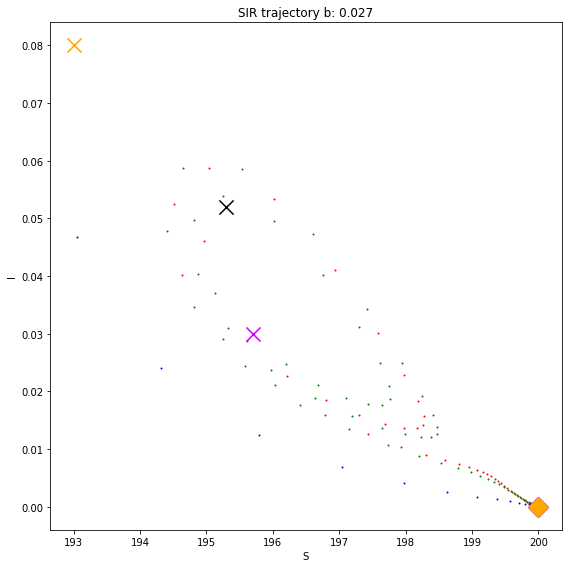

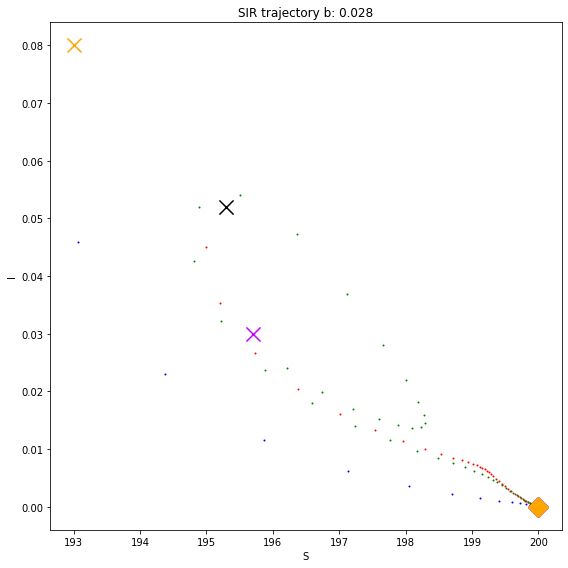

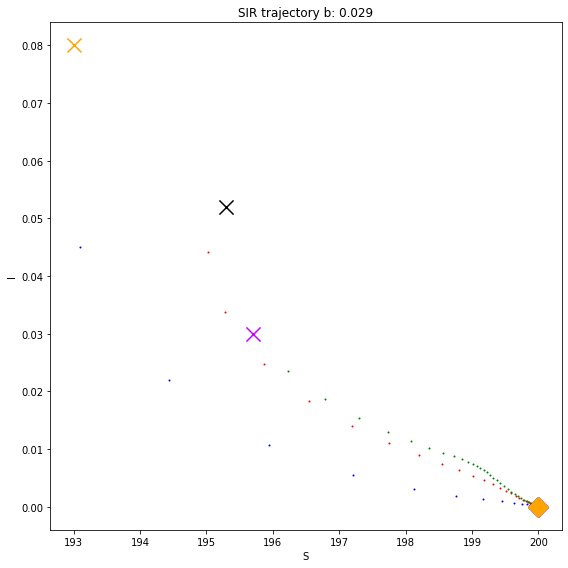

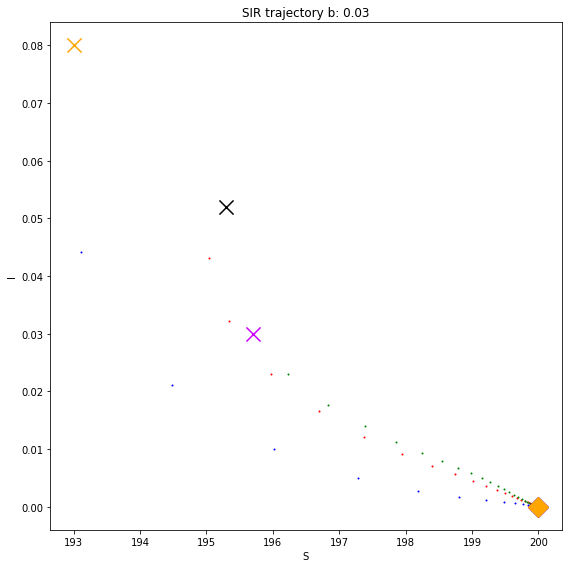

In [5]:
# task 5.3 (2D)
for i in np.arange(0.01,0.031, 0.001):
    plot_SIR_trajectories(t_0=t_0, b=round(i,3), mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu, figsize=8, two_dim=True)

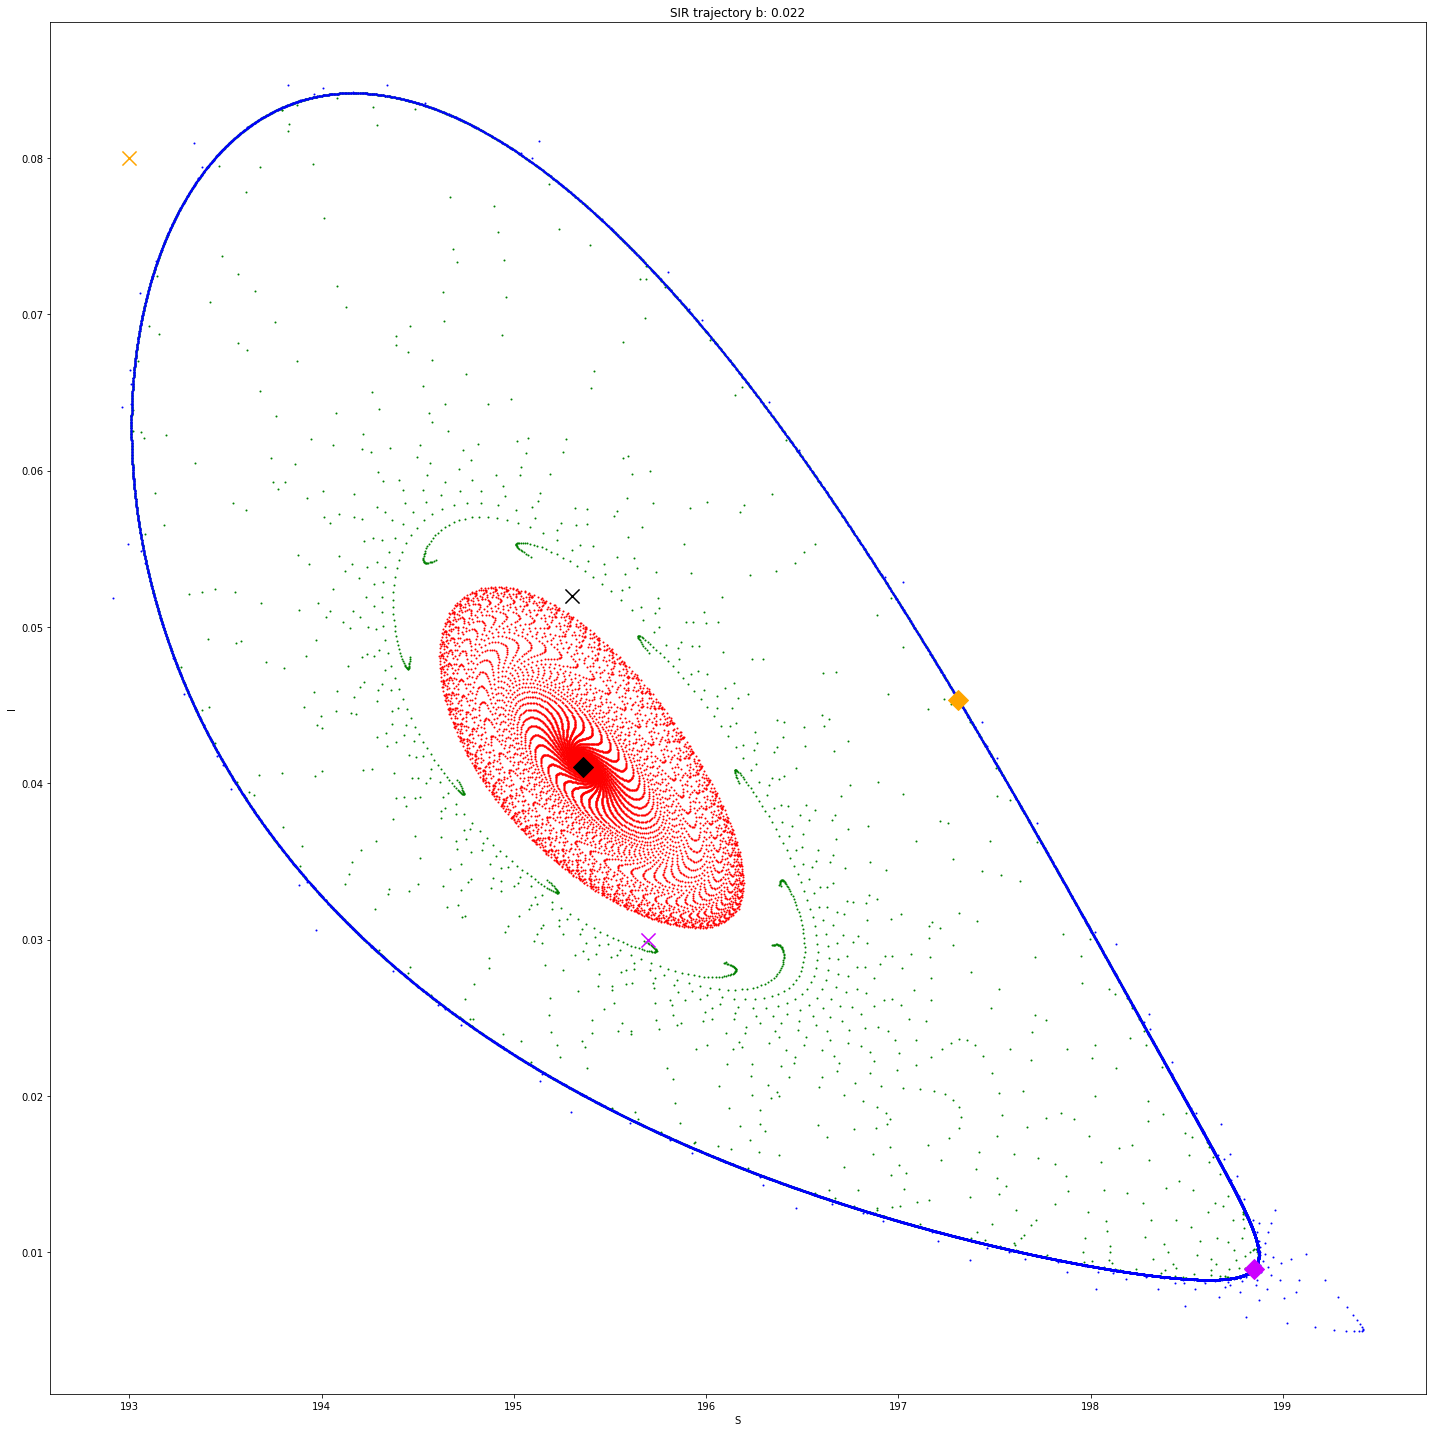

In [3]:
# task 5.4: plot of bifurcation point (2D)
plot_SIR_trajectories(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu, s=200, two_dim=True)

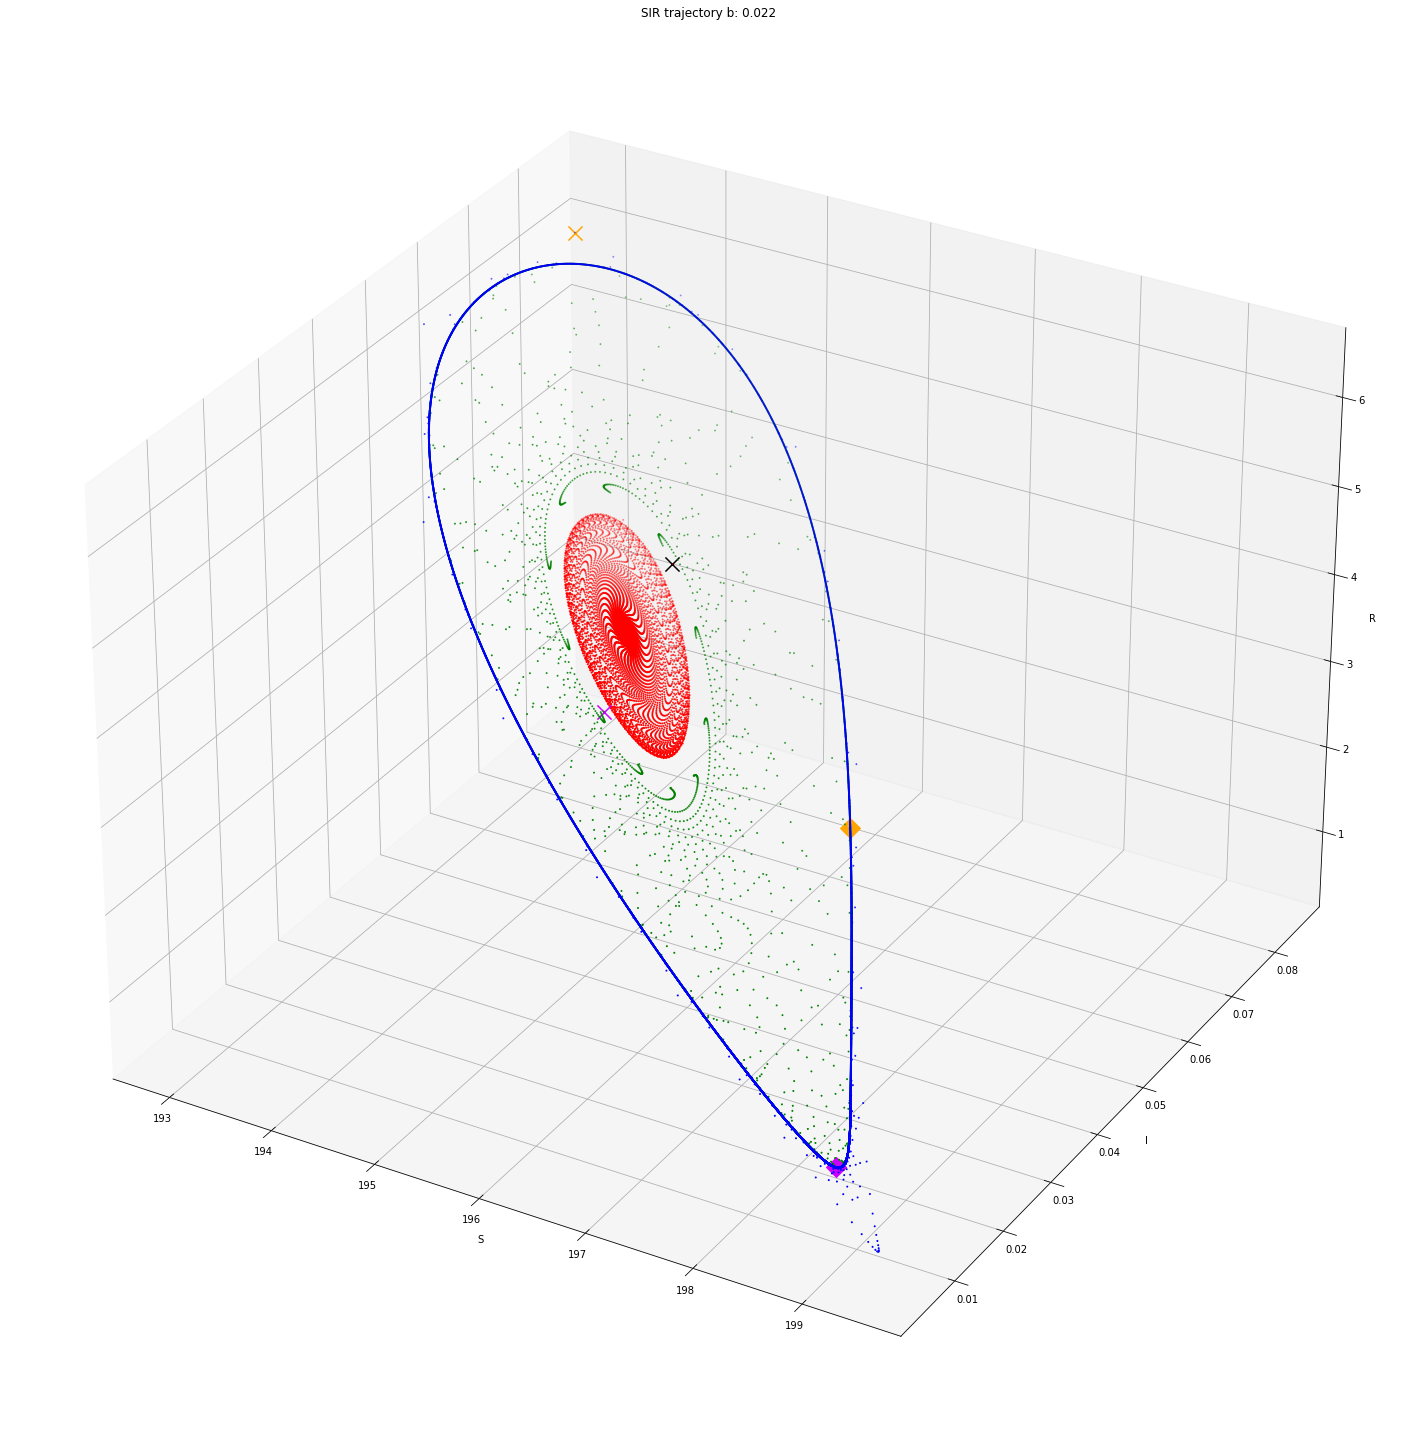

In [4]:
# task 5.4: plot of bifurcation point (3D)
plot_SIR_trajectories(t_0=t_0, b=0.022, mu0=mu0, mu1=mu1, beta=beta, A=A, d=d, nu=nu, s=200)